## 1. Notebook Initialization

In [2]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from random import randint

In [3]:
# Opciones de pandas
rows, cols = 400, 100
pd.set_option("display.max.columns", cols)
pd.set_option("display.max.rows", rows)
# Rutas
PATH = "../../data/fundamental_data/"

## 2. Preliminar Tests

In [3]:
data = pd.read_csv(PATH+'Windowed_IBM_Manual_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
#data.set_index(pd.DatetimeIndex(list(data.index)).strftime('%Y-%m'), inplace=True)
data

,0,1,2,3,4,5,6,7,8,9,10,11,Prediction
1986-03,-1.232322,-1.079314,-0.669004,-1.232322,-1.084088,-0.669004,-1.232322,-1.081432,-0.669004,-1.232322,-1.007231,-0.669004,15.921562
1986-06,-1.232322,-1.084088,-0.669004,-1.232322,-1.081432,-0.669004,-1.232322,-1.007231,-0.669004,-1.232322,-1.013861,-0.669004,14.741072
1986-09,-1.232322,-1.081432,-0.669004,-1.232322,-1.007231,-0.669004,-1.232322,-1.013861,-0.669004,-1.232322,-1.022850,-0.669004,13.267827
1986-12,-1.232322,-1.007231,-0.669004,-1.232322,-1.013861,-0.669004,-1.232322,-1.022850,-0.669004,-1.232322,-1.047896,-0.669004,16.734827
1987-03,-1.232322,-1.013861,-0.669004,-1.232322,-1.022850,-0.669004,-1.232322,-1.047896,-0.669004,-1.232322,-1.079154,-0.669004,18.234604
1987-06,-1.232322,-1.022850,-0.669004,-1.232322,-1.047896,-0.669004,-1.232322,-1.079154,-0.669004,-1.232322,-1.005595,-0.669004,17.033018
1987-09,-1.232322,-1.047896,-0.669004,-1.232322,-1.079154,-0.669004,-1.232322,-1.005595,-0.669004,-1.232322,-0.973774,-0.669004,13.170275
1987-12,-1.232322,-1.079154,-0.669004,-1.232322,-1.005595,-0.669004,-1.232322,-0.973774,-0.669004,-1.232322,-0.999268,-0.669004,12.397405
1988-03,-1.232322,-1.005595,-0.669004,-1.232322,-0.973774,-0.669004,-1.232322,-0.999268,-0.669004,-1.232322,-1.081224,-0.669004,14.816329
1988-06,-1.232322,-0.973774,-0.669004,-1.232322,-0.999268,-0.669004,-1.232322,-1.081224,-0.669004,-1.232322,-1.097622,-0.669004,13.538924


## 2.1 No scaled y dataset evaluation

In [4]:
from lib.fundamental_lib import param_tuner
from sklearn.model_selection import ShuffleSplit
stocks = ['NSC', 'GL', 'PEP', 'BDX', 'IBM']
cv = ShuffleSplit(n_splits=10, test_size=0.2)
mlp = GridSearchCV(MLPRegressor(max_iter=100000), n_jobs=-1, cv=cv,
                   param_grid={"hidden_layer_sizes": [(20,), (30,), (50,), (20,20)],
                               "activation": ['identity', 'logistic', 'tanh', 'relu'],
                               "solver": ['sgd', 'adam']
                              },
                   scoring="neg_root_mean_squared_error"
)
data = pd.read_csv(PATH+'Windowed_IBM_Manual_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
print(param_tuner(data,mlp,scaling=False))

/home/geff/miniconda3/envs/tesis/lib/python3.6/site-packages/sklearn/model_selection/_search.py:921: UserWarning: One or more of the test scores are non-finite: [-11.08616996 -11.02577658 -11.08512859 -11.03301262 -11.08420261
 -11.03103615          nan -11.06691485 -10.82695843 -12.76026511
 -20.85564154 -12.16253951 -21.56989714 -11.83812989 -12.53303173
 -12.1012484  -12.33411861 -15.40952982 -11.69738062 -13.9981604
 -10.99342124 -13.60062177  -9.71373989 -13.79820073 -11.35466586
 -14.04498035 -11.28820822 -13.30343747 -11.59396482 -13.51700056
 -54.32039388 -13.71001472]
  category=UserWarning


{'activation': 'tanh', 'hidden_layer_sizes': (20, 20), 'solver': 'sgd'}


In [ ]:
from lib.fundamental_lib import evaluate_estimator
from sklearn.model_selection import ShuffleSplit
Params={'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 40, 'oob_score': False}
mlp = MLPRegressor(max_iter=50000, activation=Params['activation'], hidden_layer_sizes=Params['hidden_layer_sizes'], solver=Params['solver'])
cv = ShuffleSplit(n_splits=10, test_size=0.2)
evaluate_estimator('Windowed_{}_Manual_dataset.csv', PATH, mlp, cv=cv, scaling=False)

## 2.2 Scaled y dataset evaluation

In [5]:
from lib.fundamental_lib import param_tuner
from sklearn.model_selection import ShuffleSplit
stocks = ['NSC', 'GL', 'PEP', 'BDX', 'IBM']
cv = ShuffleSplit(n_splits=10, test_size=0.2)
mlp = GridSearchCV(MLPRegressor(max_iter=100000), n_jobs=-1, cv=cv,
                   param_grid={"hidden_layer_sizes": [(20,), (30,), (50,), (20,20)],
                               "activation": ['identity', 'logistic', 'tanh', 'relu'],
                               "solver": ['sgd', 'adam']
                              },
                   scoring="neg_root_mean_squared_error"
)
data = pd.read_csv(PATH+'Windowed_IBM_Manual_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
print(param_tuner(data,mlp,scaling=True))

{'activation': 'relu', 'hidden_layer_sizes': (20, 20), 'solver': 'adam'}


In [ ]:
from lib.fundamental_lib import evaluate_estimator
from sklearn.model_selection import ShuffleSplit
Params={'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 40, 'oob_score': False}
mlp = MLPRegressor(max_iter=50000, activation=Params['activation'], hidden_layer_sizes=Params['hidden_layer_sizes'], solver=Params['solver'])
cv = ShuffleSplit(n_splits=10, test_size=0.2)
evaluate_estimator('Windowed_{}_Manual_dataset.csv', PATH, mlp, cv=cv, scaling=True)

## 3.0 Model testing settings

In [7]:
from lib.fundamental_lib import make_dict
datas = make_dict('Windowed_{}_Manual_dataset.csv', PATH)

## 3.1 Random split - No scaled prediction variable

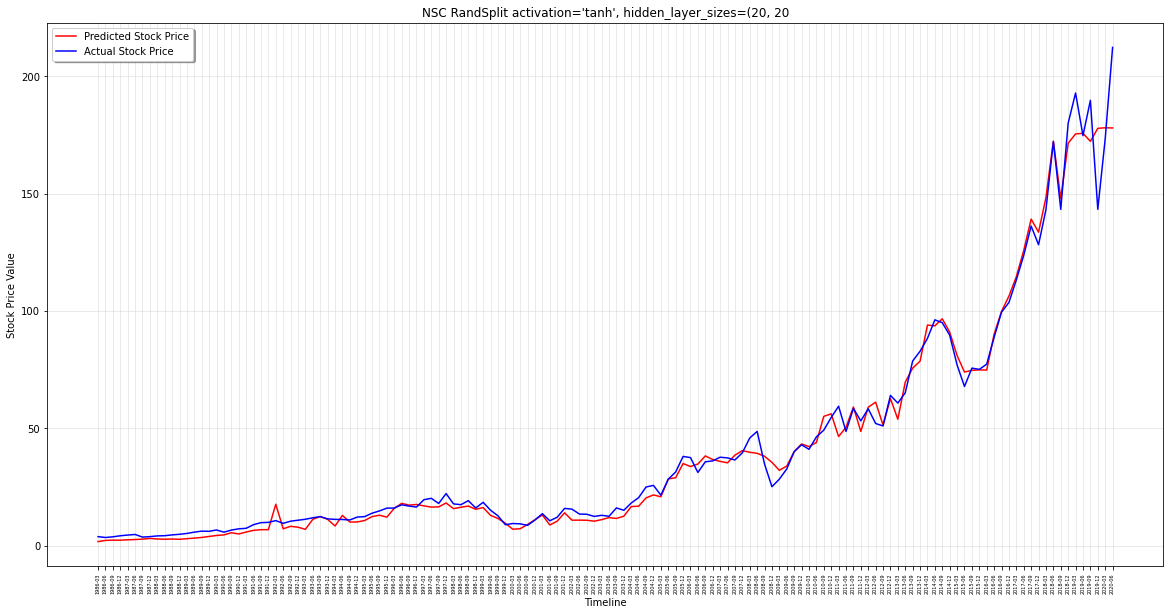

NSC MODEL RESULTS
 RMSE
 	Test: 6.580674412956436
 MAPE
 	Test: 0.21963721139190806
 MAE
 	Test: 4.772138249378007
 R2 Score Adj
 	Test: 0.9750678417439776



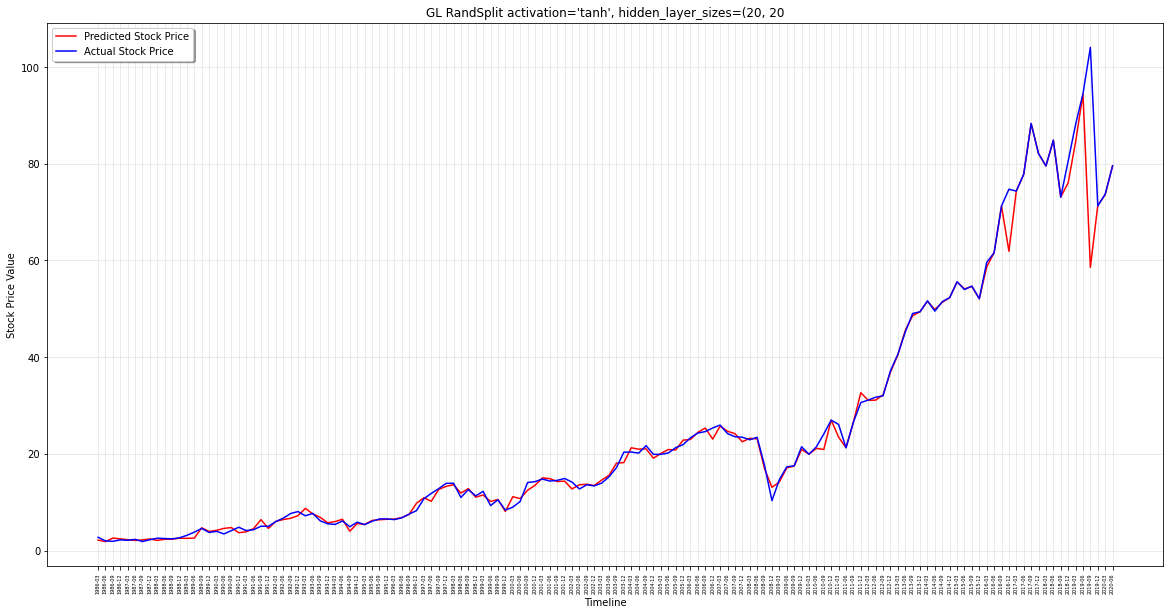

GL MODEL RESULTS
 RMSE
 	Test: 9.082660217684383
 MAPE
 	Test: 0.1417189310845476
 MAE
 	Test: 3.3039840202516695
 R2 Score Adj
 	Test: 0.8228381362323498



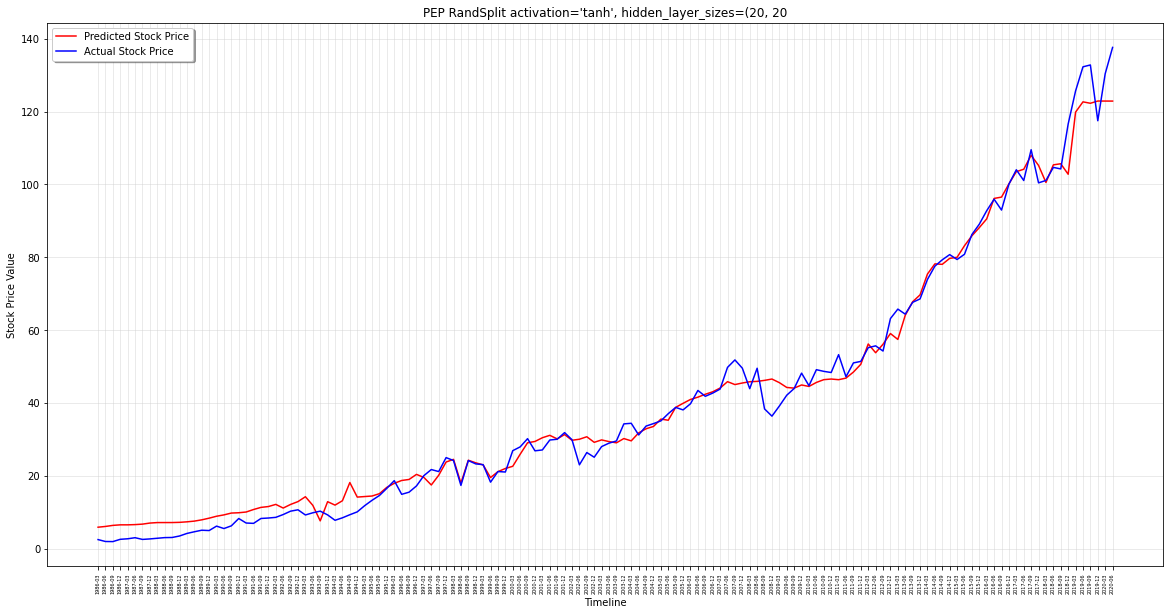

PEP MODEL RESULTS
 RMSE
 	Test: 5.160829377909613
 MAPE
 	Test: 0.4349803995330518
 MAE
 	Test: 4.1639911380468035
 R2 Score Adj
 	Test: 0.9699422321226834



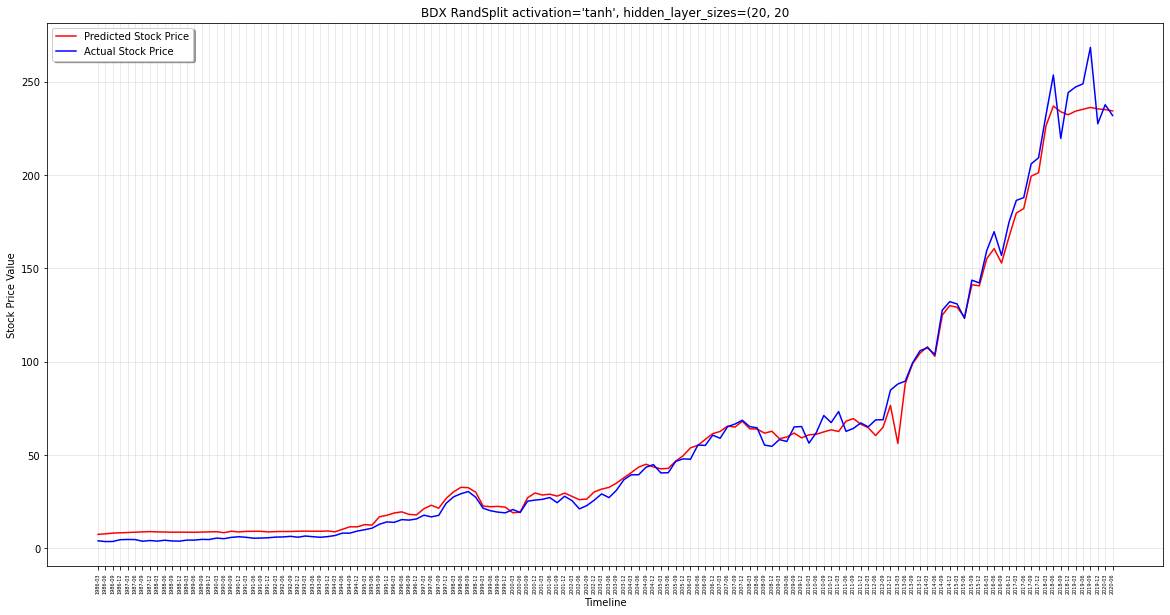

BDX MODEL RESULTS
 RMSE
 	Test: 10.292583860754707
 MAPE
 	Test: 0.3933690670770401
 MAE
 	Test: 6.986765503297237
 R2 Score Adj
 	Test: 0.9703975900930352



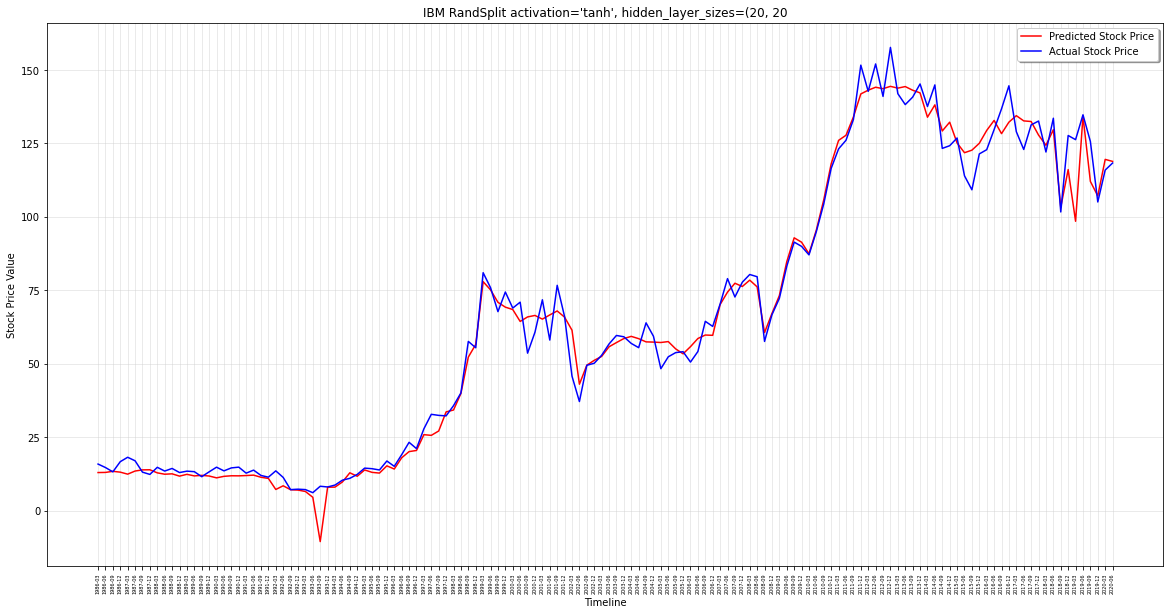

IBM MODEL RESULTS
 RMSE
 	Test: 8.98942187738797
 MAPE
 	Test: 0.19305119524122907
 MAE
 	Test: 6.163281545922959
 R2 Score Adj
 	Test: 0.9511058009102276



In [8]:
from lib.fundamental_lib import model_results_revised
#Best Params
#Params={'activation': 'identity', 'hidden_layer_sizes': 50, 'solver': 'sgd'}
#Params={'activation': 'logistic', 'hidden_layer_sizes': (20,), 'solver': 'sgd'}
#Params={'activation': 'identity', 'hidden_layer_sizes': (30,), 'solver': 'sgd'}
#Params={'activation': 'identity', 'hidden_layer_sizes': (20, 20), 'solver': 'sgd'}
#Params={'activation': 'identity', 'hidden_layer_sizes': (20,), 'solver': 'adam'}
#Params={'activation': 'identity', 'hidden_layer_sizes': (30,), 'solver': 'adam'} #error
Params={'activation': 'tanh', 'hidden_layer_sizes': (20, 20), 'solver': 'sgd'}
mlp = MLPRegressor(max_iter=100000, activation=Params['activation'], hidden_layer_sizes=Params['hidden_layer_sizes'], solver=Params['solver'])
for stock in ['NSC', 'GL', 'PEP', 'BDX', 'IBM']:
    model_results_revised(datas[stock], mlp, label=stock, scaling=False, start='1986-03')

## 3.2 Random split - Scaled prediction variable

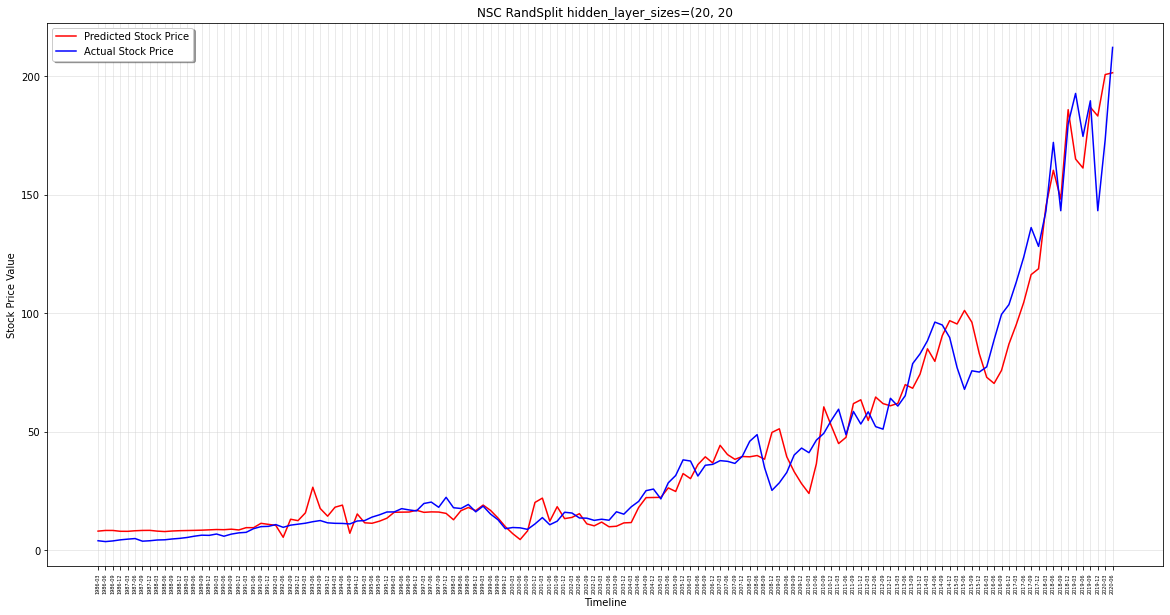

NSC MODEL RESULTS
 RMSE
 	Test: 8.470012838518512
 MAPE
 	Test: 0.32618887404173286
 MAE
 	Test: 6.0459539188477835
 R2 Score Adj
 	Test: 0.9586964667822256



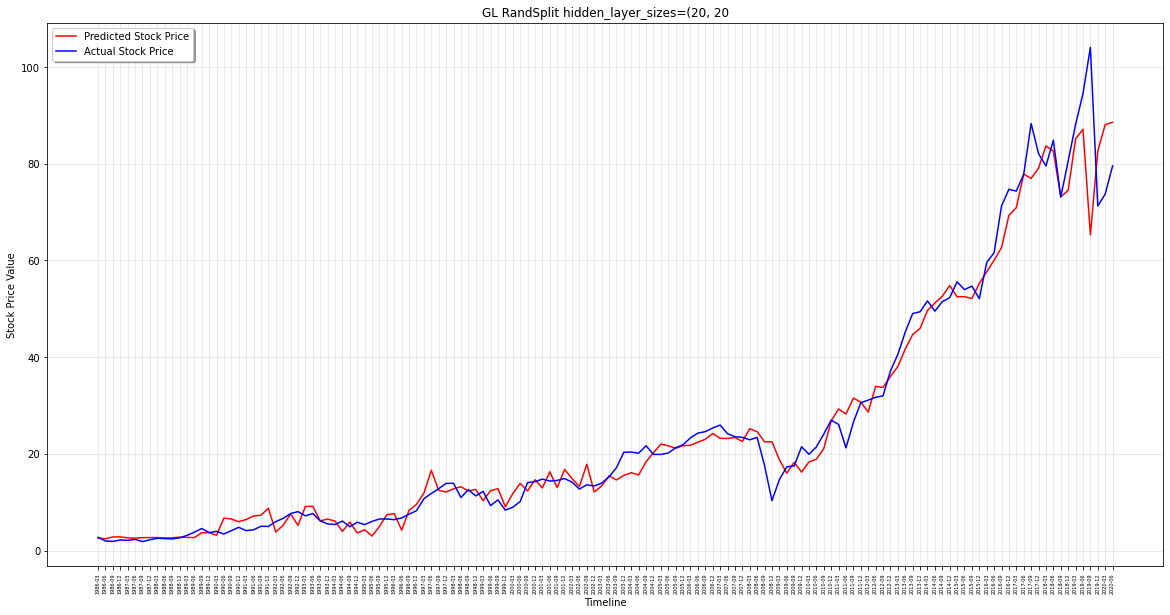

GL MODEL RESULTS
 RMSE
 	Test: 7.745409264403611
 MAPE
 	Test: 0.18876385648380026
 MAE
 	Test: 3.295089635828599
 R2 Score Adj
 	Test: 0.8711653011291174



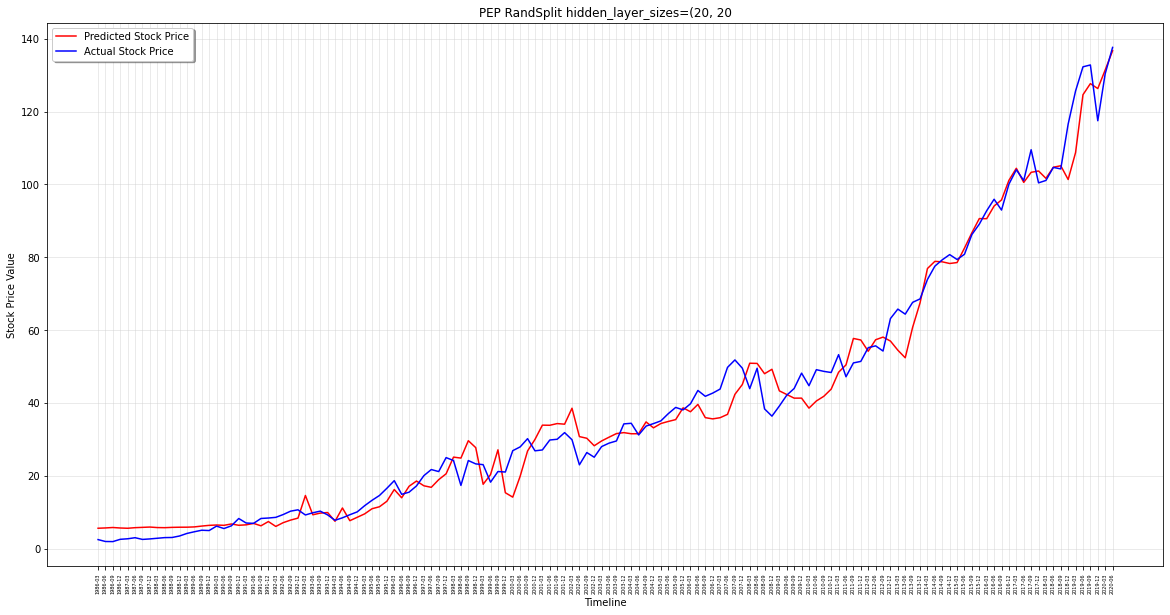

PEP MODEL RESULTS
 RMSE
 	Test: 6.4147097731706895
 MAPE
 	Test: 0.3436772709907559
 MAE
 	Test: 4.7440266473744375
 R2 Score Adj
 	Test: 0.9535621881095583



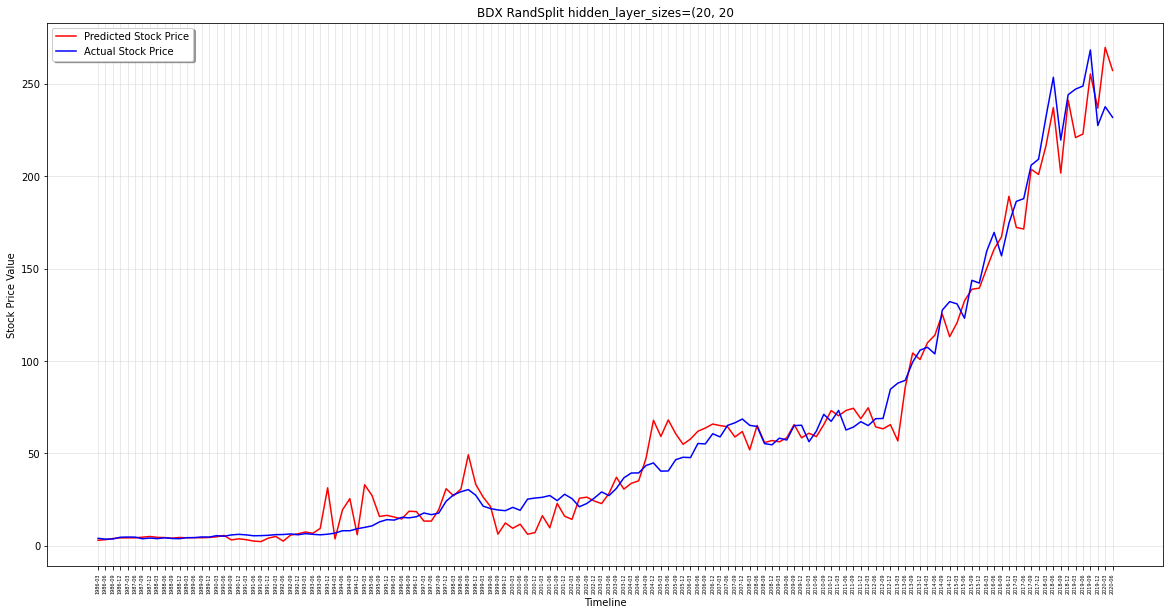

BDX MODEL RESULTS
 RMSE
 	Test: 10.786171888172301
 MAPE
 	Test: 0.27203933555497445
 MAE
 	Test: 7.116998940808045
 R2 Score Adj
 	Test: 0.967490303617716



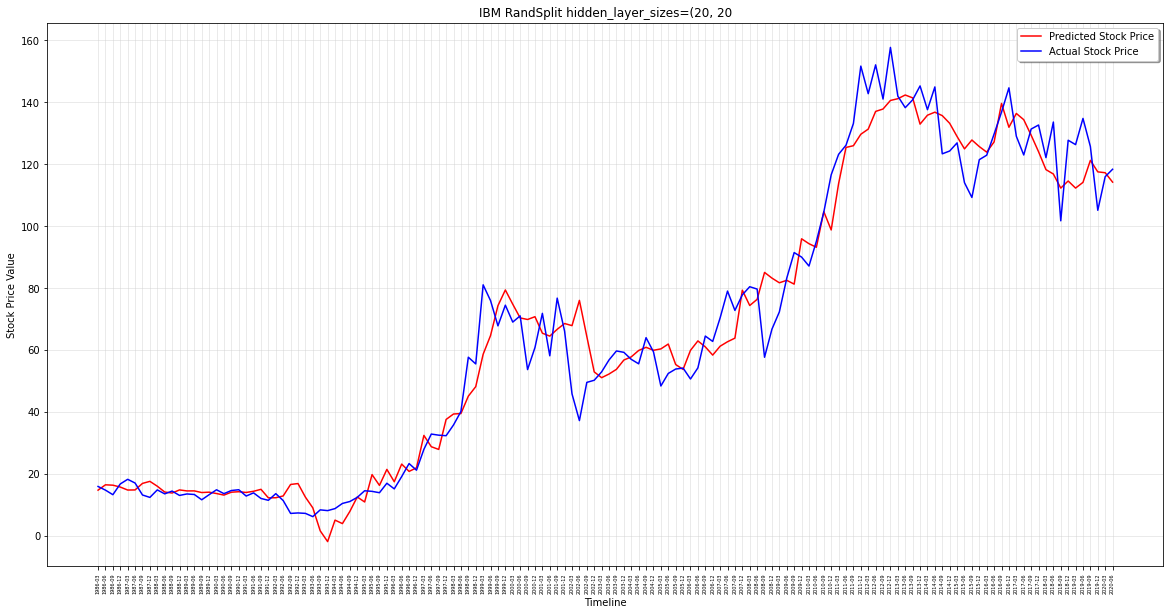

IBM MODEL RESULTS
 RMSE
 	Test: 8.853874053538158
 MAPE
 	Test: 0.1683864342505306
 MAE
 	Test: 6.2874316501229215
 R2 Score Adj
 	Test: 0.9525691954808895



In [9]:
from lib.fundamental_lib import model_results_revised
#Best Params
#Params={'activation': 'identity', 'hidden_layer_sizes': 50, 'solver': 'sgd'}
#Params={'activation': 'logistic', 'hidden_layer_sizes': (20,), 'solver': 'sgd'}
#Params={'activation': 'identity', 'hidden_layer_sizes': (30,), 'solver': 'sgd'}
#Params={'activation': 'identity', 'hidden_layer_sizes': (50,), 'solver': 'adam'}
Params={'activation': 'relu', 'hidden_layer_sizes': (20, 20), 'solver': 'adam'}
mlp = MLPRegressor(max_iter=100000, activation=Params['activation'], hidden_layer_sizes=Params['hidden_layer_sizes'], solver=Params['solver'])
for stock in ['NSC', 'GL', 'PEP', 'BDX', 'IBM']:
    model_results_revised(datas[stock], mlp, label=stock, scaling=True, start='1986-03')

## 3.3 Sequential split - No scaled prediction variable

In [ ]:
from lib.fundamental_lib import holdout
mlp = GridSearchCV(MLPRegressor(max_iter=100000), n_jobs=-1, error_score=1, 
                   param_grid={"hidden_layer_sizes": [(5,), (10,), (20,), (30,), (50,)],
                               "activation": ['identity', 'logistic', 'tanh', 'relu'],
                               "solver": ['sgd', 'adam']
                              },
                   scoring="neg_root_mean_squared_error"
)
data = pd.read_csv(PATH+'IBM_Manual_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
holdout(data, mlp, scaling=False, manual=True)

In [ ]:
from lib.fundamental_lib import model_results
#Best Params
Params={'activation': 'identity', 'hidden_layer_sizes': 50, 'solver': 'sgd'}
mlp = MLPRegressor(activation=Params['activation'], hidden_layer_sizes=Params['hidden_layer_sizes'], solver=Params['solver'])
for stock in ['NSC', 'GL', 'PEP', 'BDX', 'IBM']:
    data = pd.read_csv(PATH+'{}_Manual_dataset.csv'.format(stock), header=0, index_col=0, low_memory=False)
    data.sort_index(ascending=True, inplace=True)
    model_results_seq(data, mlp, label=stock, scaling=False)

## 3.4 Sequential split - Scaled prediction variable

In [ ]:
from lib.fundamental_lib import holdout
mlp = GridSearchCV(MLPRegressor(max_iter=100000), n_jobs=-1, error_score=1, 
                   param_grid={"hidden_layer_sizes": [(5,), (10,), (20,), (30,), (50,)],
                               "activation": ['identity', 'logistic', 'tanh', 'relu'],
                               "solver": ['sgd', 'adam']
                              },
                   scoring="neg_root_mean_squared_error"
)
data = pd.read_csv(PATH+'IBM_Manual_dataset.csv', header=0, index_col=0, low_memory=False)
data.sort_index(ascending=True, inplace=True)
holdout(data, mlp, scaling=True, manual=True)

In [ ]:
from lib.fundamental_lib import model_results
#Best Params
Params={'activation': 'identity', 'hidden_layer_sizes': 50, 'solver': 'sgd'}
mlp = MLPRegressor(activation=Params['activation'], hidden_layer_sizes=Params['hidden_layer_sizes'], solver=Params['solver'])
for stock in ['NSC', 'GL', 'PEP', 'BDX', 'IBM']:
    data = pd.read_csv(PATH+'{}_Manual_dataset.csv'.format(stock), header=0, index_col=0, low_memory=False)
    data.sort_index(ascending=True, inplace=True)
    model_results_seq(data, mlp, label=stock, scaling=True)

In [6]:
print(type((50,)))

<class 'tuple'>
